# Effectively using matplotlib

From a tutorial on the eeenterneeet.
http://pbpython.com/effective-matplotlib.html

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
%matplotlib inline

In [3]:
df = pd.read_excel("https://github.com/chris1610/pbpython/blob/master/data/sample-salesv3.xlsx?raw=true")
df.head()

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2014-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2014-01-01 23:26:55


In [4]:
top_10 = (df.groupby('name')['ext price', 'quantity'].agg({'ext price': 'sum', 'quantity': 'count'})
            .sort_values(by='ext price', ascending=False))[:10].reset_index()
top_10.rename(columns={'name': 'Name', 'ext price': 'Sales', 'quantity': 'Purchases'}, inplace=True)

In [5]:
top_10

,Name,Sales,Purchases
0,Kulas Inc,137351.96,94
1,White-Trantow,135841.99,86
2,Trantow-Barrows,123381.38,94
3,Jerde-Hilpert,112591.43,89
4,"Fritsch, Russel and Anderson",112214.71,81
5,Barton LLC,109438.50,82
6,Will LLC,104437.60,74
7,Koepp Ltd,103660.54,82
8,"Frami, Hills and Schmidt",103569.59,72
9,Keeling LLC,100934.30,74


In [6]:
plt.style.available

[u'seaborn-darkgrid',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'_classic_test',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'seaborn-bright',
 u'seaborn-poster',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn',
 u'seaborn-dark-palette']

In [7]:
plt.style.use('ggplot')

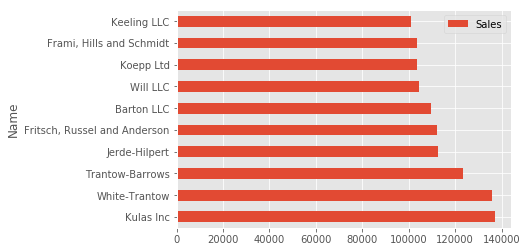

In [8]:
top_10.plot(kind='barh', y="Sales", x="Name")

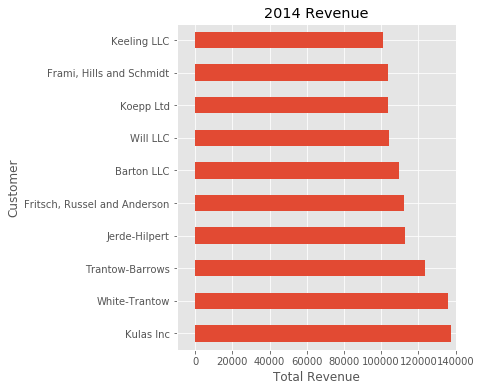

In [12]:
# Setting fig and ax makes it easier to customize the plots
fig, ax = plt.subplots(figsize=(5,6))
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)
ax.set_xlim([-10000, 140000])
ax.set(title="2014 Revenue", xlabel='Total Revenue', ylabel='Customer')
ax.legend().set_visible(False)

## Tick formatting

In [13]:
def currency(x, pos):
    """
    The two args are the value and the tick position
    """
    if x >= 1000000:
        return '${:1.1f}M'.format(x*1e-6)
    return '${:1.0f}K'.format(x*1e-3)

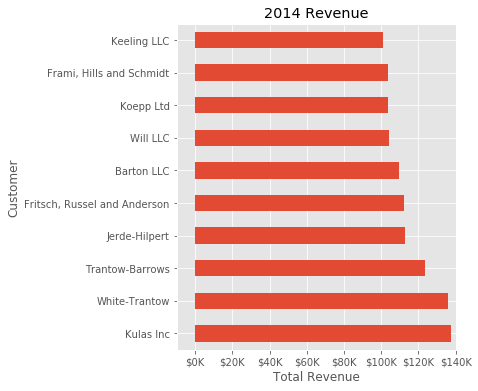

In [14]:
# Setting fig and ax makes it easier to customize the plots
fig, ax = plt.subplots(figsize=(5,6))
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)
ax.set_xlim([-10000, 140000])
ax.set(title="2014 Revenue", xlabel='Total Revenue', ylabel='Customer')

# Using a tick formatting function
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)

ax.legend().set_visible(False)

## Annotations

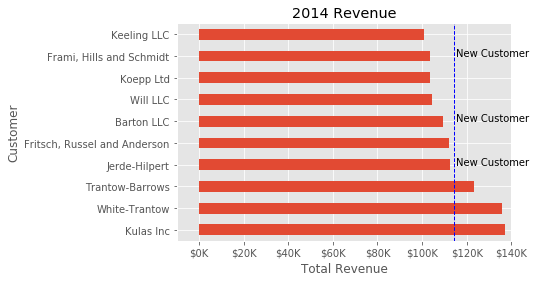

In [15]:
# Setting fig and ax makes it easier to customize the plots
fig, ax = plt.subplots()

# Plot the data and get the average
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)
avg = top_10['Sales'].mean()

# Set limits and labels
ax.set_xlim([-10000, 140000])
ax.set(title="2014 Revenue", xlabel='Total Revenue', ylabel='Customer')

# Add a line for the average
ax.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)

# Annotate new customers
for cust in [3, 5, 8]:
    ax.text(115000, cust, "New Customer")

# Using a tick formatting function
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)

# Hides the legend
ax.legend().set_visible(False)


## Using figures and sublots 

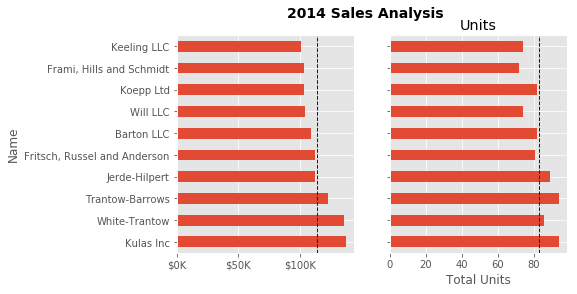

In [19]:
# Get the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(7,4))

# Plot on the first axes
top_10.plot(kind='barh', y='Sales', x='Name', ax=ax0)
ax.set_xlim([-10000, 140000])
ax.set(title="2014 Revenue", xlabel='Total Revenue', ylabel='Customers')

# Format currency values
formatter = FuncFormatter(currency)
ax0.xaxis.set_major_formatter(formatter)

# Plot the average as a vertical line
avg = top_10['Sales'].mean()
ax0.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)


# Repeat for the unit plot
top_10.plot(kind='barh', y="Purchases", x="Name", ax=ax1)
avg = top_10['Purchases'].mean()
ax1.set(title='Units', xlabel='Total Units', ylabel='')
ax1.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)

# Title the figure 
fig.suptitle('2014 Sales Analysis', fontsize=14, fontweight='bold')

# Hide the legends
ax1.legend().set_visible(False)
ax0.legend().set_visible(False)